<a href="https://colab.research.google.com/github/mehrnooshkarimi/GateContrib/blob/master/RAndomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving static-1.zip to static-1.zip


In [2]:
import zipfile
import os

zip_path = "static-1.zip"
extract_path = "radiomics_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted to:", extract_path)


Files extracted to: radiomics_data


In [3]:
import pandas as pd
import glob

# Read all Excel files into a list of DataFrames
all_files = glob.glob(os.path.join("radiomics_data", "*.xlsx"))
df_list = [pd.read_excel(file) for file in all_files]

# Concatenate all DataFrames
full_df = pd.concat(df_list, ignore_index=True)

# Show basic info
print("Combined shape:", full_df.shape)
full_df.head()


Combined shape: (870, 82)


,id,Target_ contrast,shape_Elongation,shape_Flatness,shape_LeastAxisLength,shape_MajorAxisLength,shape_Maximum2DDiameterColumn,shape_Maximum2DDiameterRow,shape_Maximum2DDiameterSlice,shape_Maximum3DDiameter,...,glszm_SmallAreaEmphasis,glszm_SmallAreaHighGrayLevelEmphasis,glszm_SmallAreaLowGrayLevelEmphasis,glszm_ZoneEntropy,glszm_ZonePercentage,ngtdm_Busyness,ngtdm_Coarseness,ngtdm_Contrast,ngtdm_Strength,Target_ contrast
0,2262,-1.0,0.140913,0.140095,5.814742,41.505704,36.476234,36.476234,6.609375,36.476234,...,0.460655,11.298743,0.083627,4.830838,0.058957,1.749961,0.010322,0.044378,0.323659,NaN
1,2263,-1.0,0.158227,0.129820,5.087899,39.191836,34.386422,34.386422,6.274503,34.456927,...,0.427214,10.883147,0.061114,4.696103,0.052430,1.403272,0.011716,0.041795,0.368920,NaN
2,2264,-1.0,0.141331,0.141331,5.539003,39.191836,34.284326,34.284326,5.920721,34.409940,...,0.439394,8.100330,0.081802,4.079143,0.045752,2.181859,0.010400,0.023235,0.225051,NaN
3,2265,-1.0,0.110150,0.107285,4.225761,39.388169,34.197700,34.197700,5.295653,34.394263,...,0.458853,4.392840,0.180101,3.813661,0.057471,3.647663,0.019679,0.030570,0.136932,NaN
4,2266,0.0,0.100090,0.100090,4.154252,41.505020,36.119647,36.119647,4.702294,36.238899,...,0.412427,4.110287,0.091198,3.733661,0.055556,2.614826,0.015187,0.038682,0.173954,NaN


In [4]:
# Drop 'id' column if it's not useful for prediction
df = full_df.drop(columns=["id"])

# Drop rows with missing values (if any)
df = df.dropna()

# Define features (X) and target (y)
X = df.drop(columns=["Target_ contrast"])
y = df["Target_ contrast"]

print("Data shape after cleaning:", X.shape)
print("Target classes:", y.value_counts())


Data shape after cleaning: (0, 80)
Target classes: Series([], Name: count, dtype: int64)


In [5]:
# Count missing values per column
missing = full_df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)


,0
Target_ contrast,812
Target_ contrast,58
ngtdm_Strength,1


In [6]:
# Remove duplicated columns (especially duplicated 'Target_ contrast')
df_clean = full_df.loc[:, ~full_df.columns.duplicated()]

# Drop rows where 'Target_ contrast' is missing
df_clean = df_clean.dropna(subset=["Target_ contrast"])

# Drop 'id' column
df_clean = df_clean.drop(columns=["id"])

# Drop other rows with any missing values (very few left, like ngtdm_Strength)
df_clean = df_clean.dropna()

# Split into features and labels
X = df_clean.drop(columns=["Target_ contrast"])
y = df_clean["Target_ contrast"]

print("✅ Cleaned data shape:", X.shape)
print("🎯 Target value counts:\n", y.value_counts())


✅ Cleaned data shape: (0, 80)
🎯 Target value counts:
 Series([], Name: count, dtype: int64)


In [7]:
print("Columns in the DataFrame:")
print(full_df.columns.tolist())

# Show rows where 'Target_ contrast' is not missing
full_df[full_df["Target_ contrast"].notna()].head(10)


Columns in the DataFrame:
['id', 'Target_ contrast', 'shape_Elongation', 'shape_Flatness', 'shape_LeastAxisLength', 'shape_MajorAxisLength', 'shape_Maximum2DDiameterColumn', 'shape_Maximum2DDiameterRow', 'shape_Maximum2DDiameterSlice', 'shape_Maximum3DDiameter', 'shape_MeshVolume', 'shape_MinorAxisLength', 'shape_Sphericity', 'shape_SurfaceArea', 'shape_SurfaceVolumeRatio', 'shape_VoxelVolume', 'firstorder_10Percentile', 'firstorder_90Percentile', 'firstorder_Energy', 'firstorder_Entropy', 'firstorder_InterquartileRange', 'firstorder_Kurtosis', 'firstorder_Maximum', 'firstorder_MeanAbsoluteDeviation', 'firstorder_Mean', 'firstorder_Median', 'firstorder_Range', 'firstorder_RobustMeanAbsoluteDeviation', 'firstorder_RootMeanSquared', 'firstorder_TotalEnergy', 'glcm_Autocorrelation', 'glcm_Correlation', 'glcm_DifferenceAverage', 'glcm_DifferenceEntropy', 'glcm_DifferenceVariance', 'glcm_Id', 'glcm_Idm', 'glcm_Idmn', 'glcm_Idn', 'glcm_Imc1', 'glcm_Imc2', 'glcm_InverseVariance', 'glcm_JointA

,id,Target_ contrast,shape_Elongation,shape_Flatness,shape_LeastAxisLength,shape_MajorAxisLength,shape_Maximum2DDiameterColumn,shape_Maximum2DDiameterRow,shape_Maximum2DDiameterSlice,shape_Maximum3DDiameter,...,glszm_SmallAreaEmphasis,glszm_SmallAreaHighGrayLevelEmphasis,glszm_SmallAreaLowGrayLevelEmphasis,glszm_ZoneEntropy,glszm_ZonePercentage,ngtdm_Busyness,ngtdm_Coarseness,ngtdm_Contrast,ngtdm_Strength,Target_ contrast
0,2262,-1.0,0.140913,0.140095,5.814742,41.505704,36.476234,36.476234,6.609375,36.476234,...,0.460655,11.298743,0.083627,4.830838,0.058957,1.749961,0.010322,0.044378,0.323659,NaN
1,2263,-1.0,0.158227,0.129820,5.087899,39.191836,34.386422,34.386422,6.274503,34.456927,...,0.427214,10.883147,0.061114,4.696103,0.052430,1.403272,0.011716,0.041795,0.368920,NaN
2,2264,-1.0,0.141331,0.141331,5.539003,39.191836,34.284326,34.284326,5.920721,34.409940,...,0.439394,8.100330,0.081802,4.079143,0.045752,2.181859,0.010400,0.023235,0.225051,NaN
3,2265,-1.0,0.110150,0.107285,4.225761,39.388169,34.197700,34.197700,5.295653,34.394263,...,0.458853,4.392840,0.180101,3.813661,0.057471,3.647663,0.019679,0.030570,0.136932,NaN
4,2266,0.0,0.100090,0.100090,4.154252,41.505020,36.119647,36.119647,4.702294,36.238899,...,0.412427,4.110287,0.091198,3.733661,0.055556,2.614826,0.015187,0.038682,0.173954,NaN
5,2267,-1.0,0.133454,0.133454,5.539003,41.505020,36.268651,36.268651,5.920721,36.387415,...,0.369332,2.500022,0.236163,2.913977,0.013580,12.226869,0.009216,0.029432,0.045672,NaN
6,2268,1.0,0.134730,0.133444,5.539003,41.508127,36.365176,36.268651,5.920721,36.483626,...,0.519325,7.004035,0.124280,4.293594,0.046914,2.060647,0.011163,0.050027,0.272524,NaN
7,2269,1.0,0.133454,0.133454,5.539003,41.505020,36.268651,36.268651,5.920721,36.387415,...,0.155615,0.503548,0.071397,3.588354,0.028395,5.510445,0.010085,0.028231,0.083163,NaN
8,2270,-1.0,0.133454,0.133454,5.539003,41.505020,36.268651,36.268651,5.920721,36.387415,...,0.520810,20.439061,0.058230,4.748371,0.065432,1.576556,0.009984,0.042294,0.321729,NaN
9,2271,-1.0,0.133454,0.133454,5.539003,41.505020,36.268651,36.268651,5.920721,36.387415,...,0.453995,6.439721,0.137014,3.884155,0.033333,4.237877,0.010932,0.029759,0.118766,NaN


In [8]:
# Remove duplicate/incorrect 'Target_ contrast ' column with trailing space
df_fixed = full_df.loc[:, ~full_df.columns.duplicated()]
df_fixed = df_fixed.drop(columns=["Target_ contrast "])  # remove wrong one

# Drop rows where true 'Target_ contrast' is missing
df_fixed = df_fixed.dropna(subset=["Target_ contrast"])

# Drop any remaining rows with missing values (very few)
df_fixed = df_fixed.dropna()

# Drop ID column
df_fixed = df_fixed.drop(columns=["id"])

# Split features and target
X = df_fixed.drop(columns=["Target_ contrast"])
y = df_fixed["Target_ contrast"]

print("✅ Cleaned data shape:", X.shape)
print("🎯 Target value counts:\n", y.value_counts())


✅ Cleaned data shape: (811, 79)
🎯 Target value counts:
 Target_ contrast
 0.0    286
 1.0    271
-1.0    254
Name: count, dtype: int64


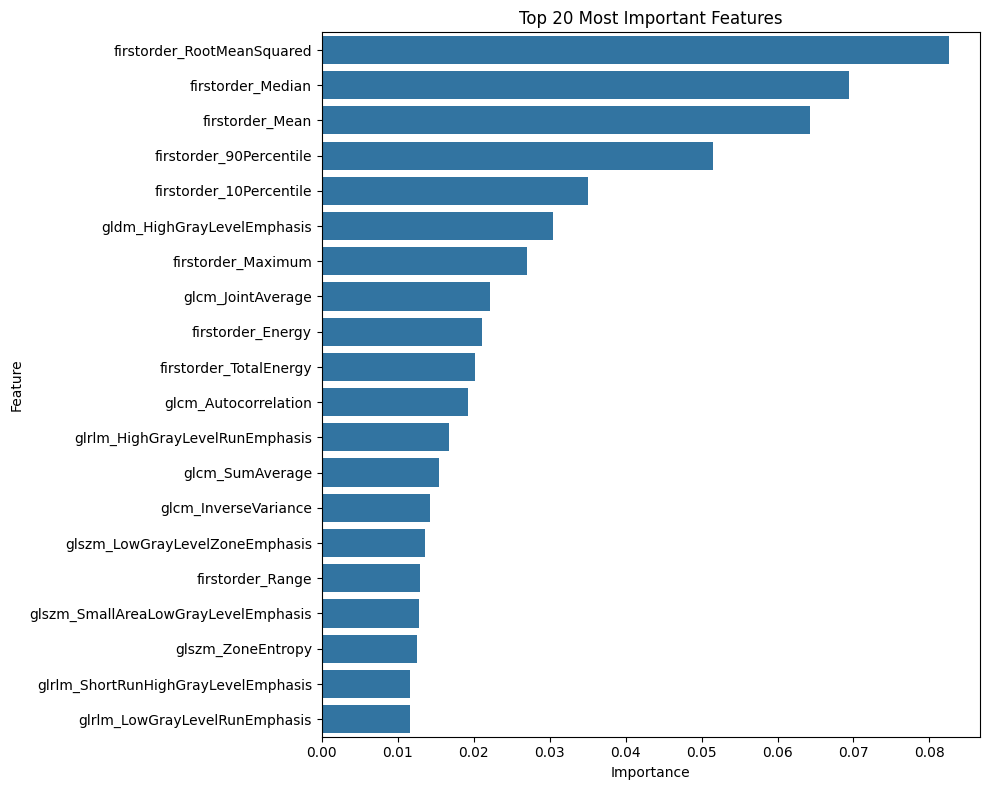

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot top 20 important features
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df.head(20))
plt.title("Top 20 Most Important Features")
plt.tight_layout()
plt.show()


In [10]:
# Save top 20 important features to CSV
top_features = importance_df.head(20)
top_features.to_csv("top_20_features.csv", index=False)

from google.colab import files
files.download("top_20_features.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
# Keep only top 20 features in X
X_top20 = X[top_features["Feature"].values]

print("New shape with top 20 features:", X_top20.shape)


New shape with top 20 features: (811, 20)


In [12]:
from sklearn.metrics import classification_report, confusion_matrix

# Split data (same method as before)
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(
    X_top20, y, test_size=0.2, random_state=42, stratify=y)

# Train the model
rf_top = RandomForestClassifier(n_estimators=100, random_state=42)
rf_top.fit(X_train_top, y_train_top)

# Predict on test set
y_pred = rf_top.predict(X_test_top)

# Show evaluation
print("📊 Classification Report:")
print(classification_report(y_test_top, y_pred))

print("\n🧾 Confusion Matrix:")
print(confusion_matrix(y_test_top, y_pred))


📊 Classification Report:
              precision    recall  f1-score   support

        -1.0       0.57      0.49      0.53        51
         0.0       0.68      0.76      0.72        58
         1.0       0.85      0.85      0.85        54

    accuracy                           0.71       163
   macro avg       0.70      0.70      0.70       163
weighted avg       0.70      0.71      0.70       163


🧾 Confusion Matrix:
[[25 20  6]
 [12 44  2]
 [ 7  1 46]]


In [13]:
# Train/test split on full feature set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Train the full model
rf_full = RandomForestClassifier(n_estimators=100, random_state=42)
rf_full.fit(X_train_full, y_train_full)

# Predict and evaluate
y_pred_full = rf_full.predict(X_test_full)

from sklearn.metrics import classification_report, confusion_matrix

print("📊 Classification Report (All Features):")
print(classification_report(y_test_full, y_pred_full))

print("\n🧾 Confusion Matrix:")
print(confusion_matrix(y_test_full, y_pred_full))


📊 Classification Report (All Features):
              precision    recall  f1-score   support

        -1.0       0.64      0.49      0.56        51
         0.0       0.69      0.79      0.74        58
         1.0       0.82      0.87      0.85        54

    accuracy                           0.72       163
   macro avg       0.72      0.72      0.71       163
weighted avg       0.72      0.72      0.72       163


🧾 Confusion Matrix:
[[25 19  7]
 [ 9 46  3]
 [ 5  2 47]]
